<a href="https://colab.research.google.com/github/Vishnucreate/Ai_ml_notebooks/blob/main/Summarizer_pdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install pypdf2
!pip install pdfplumber

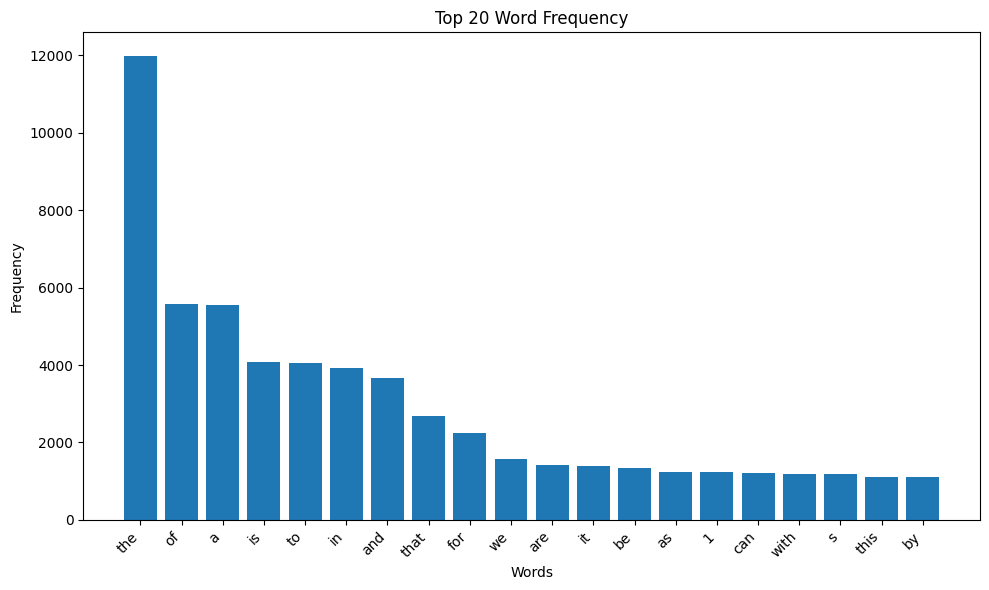

In [41]:
import pdfplumber
from collections import Counter
import matplotlib.pyplot as plt
import re

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page_num in range(0,1000):
          page = pdf.pages[page_num]
          text += page.extract_text()
    return text

# Function to create visualizations for word frequencies
def visualize_word_frequencies(word_counts, visualization_type):
    # words, counts = zip(*word_counts.items())
    sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))
    top_words = list(sorted_word_counts.keys())[:20]
    top_counts = [sorted_word_counts[word] for word in top_words]
    if visualization_type == "bar":
        plt.figure(figsize=(10, 6))
        plt.bar(top_words, top_counts)
        plt.xlabel("Words")
        plt.ylabel("Frequency")
        plt.title("Top 20 Word Frequency")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    elif visualization_type == "pie":
        plt.figure(figsize=(8, 8))
        plt.pie(top_counts, labels=words, autopct='%1.1f%%')
        plt.title("Word Distribution")
        plt.show()
    elif visualization_type == "histogram":
        plt.figure(figsize=(10, 6))
        plt.hist(top_counts, bins=20)
        plt.xlabel("Frequency")
        plt.ylabel("Number of Words")
        plt.title("Word Frequency Histogram")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("Invalid visualization type. Please choose 'bar', 'pie', or 'histogram'.")

# PDF file path
pdf_path = "/content/EDA_word.pdf"

# Extract text from PDF
text = extract_text_from_pdf(pdf_path)

# Tokenize text and count word frequencies
words = re.findall(r'\b\w+\b', text.lower())
word_counts = Counter(words)

# Choose visualization type: "bar", "pie", or "histogram"
visualization_type = "bar"
visualize_word_frequencies(word_counts, visualization_type)


In [55]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download('punkt')
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
import string
ps = PorterStemmer()
wnl = WordNetLemmatizer()


stop_words = stopwords.words('english')
stop_words.extend(['figure', 'chapter', 'problem', 'example', 'algorithm', 'x', 'b', 'n']) #Add stopwords manually according to your paper
stop_words = set(stop_words)

word_tokens = word_tokenize(text)
# converts the words in word_tokens to lower case and then checks whether
#they are present in stop_words or not
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
#with no lower case conversion
filtered_sentence = []

#Filtering words in text not in stopwords
for w in word_tokens:
	if w.lower() not in stop_words and w.isalpha():
		filtered_sentence.append(w)

print(word_tokens)
print(filtered_sentence)

stemmed_sentence = []

for word in filtered_sentence:
  stemmed_sentence.append(ps.stem(word))

lemm_sentence = []

for word in filtered_sentence:
  lemm_sentence.append(wnl.lemmatize(word))


['This', 'page', 'intentionally', 'left', 'blank', 'crazy-readers.blogspot.comArtificial', 'Intelligence', 'A', 'Modern', 'Approach', 'Third', 'Edition', 'crazy-readers.blogspot.comPRENTICE', 'HALL', 'SERIES', 'IN', 'ARTIFICIAL', 'INTELLIGENCE', 'Stuart', 'Russell', 'and', 'Peter', 'Norvig', ',', 'Editors', 'F', 'ORSYTH', '&', 'P', 'ONCE', 'G', 'RAHAM', 'J', 'URAFSKY', '&', 'M', 'ARTIN', 'N', 'EAPOLITAN', 'RUSSELL', '&', 'N', 'ORVIG', 'Computer', 'Vision', ':', 'A', 'Modern', 'Approach', 'ANSI', 'Common', 'Lisp', 'Speech', 'and', 'Language', 'Processing', ',', '2nd', 'ed', '.', 'Learning', 'Bayesian', 'Networks', 'Artificial', 'Intelligence', ':', 'A', 'Modern', 'Approach', ',', '3rd', 'ed.Artificial', 'Intelligence', 'A', 'Modern', 'Approach', 'Third', 'Edition', 'Stuart', 'J.', 'Russell', 'and', 'Peter', 'Norvig', 'Contributing', 'writers', ':', 'Ernest', 'Davis', 'Douglas', 'D.', 'Edwards', 'David', 'Forsyth', 'Nicholas', 'J.', 'Hay', 'Jitendra', 'M.', 'Malik', 'Vibhu', 'Mittal', 'M

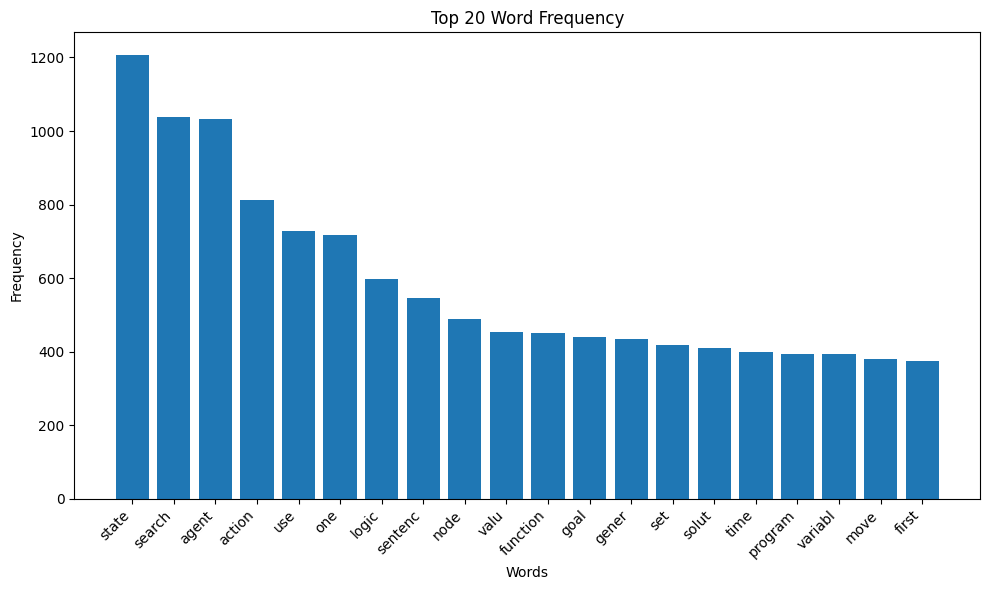

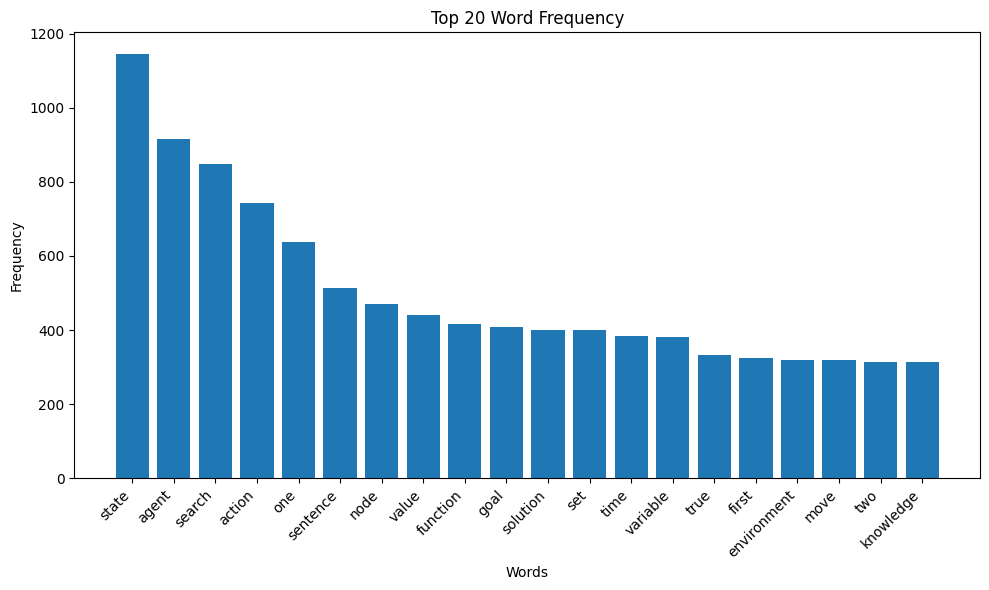

In [58]:
# Tokenize text and count word frequencies
words = re.findall(r'\b\w+\b', text.lower())
word_counts = Counter(stemmed_sentence)

# Choose visualization type: "bar", "pie", or "histogram"
visualization_type = "bar"
visualize_word_frequencies(word_counts, visualization_type)

words = re.findall(r'\b\w+\b', text.lower())
word_counts = Counter(lemm_sentence)

# Choose visualization type: "bar", "pie", or "histogram"
visualization_type = "bar"
visualize_word_frequencies(word_counts, visualization_type)